In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import time
import datetime
from datetime import timedelta
import scipy.stats as stats

In [ ]:
from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

In [4]:
# ID_51_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_051_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_52_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_052_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
# ID_51_2020_0809=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/ID_51_2020_0809.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

In [43]:
ID_85_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_085_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_45_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_045_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')
ID_14_2020=pd.read_csv(r'D:\留德十年\TUD\ADP\Data\2020/TagID_014_2020.csv',dtype= {'CreateDateTime': str, 'TagValue': np.float64, 'TagId': np.int32},parse_dates=['CreateDateTime'],index_col='Unnamed: 0')

In [5]:
Daten_0 = ID_52_2020
Daten_0 = Daten_0[(Daten_0['CreateDateTime']>'2020-08-05 00:00:00')&(Daten_0['CreateDateTime']<'2020-08-20 00:00:00')]
Daten_0.to_csv(r'D:\留德十年\TUD\ADP\Data\2020\ID_52_2020_0809.csv')

In [3]:
ID_51_2020.head()

,CreateDateTime,TagValue,TagId
0,2020-02-06 13:05:56.982,-4.050903,51
1,2020-02-06 13:05:57.207,-2.314819,51
2,2020-02-06 13:05:57.411,-4.050903,51
3,2020-02-06 13:05:58.025,-2.314819,51
4,2020-02-06 13:05:58.230,-3.472168,51


<AxesSubplot:xlabel='CreateDateTime'>

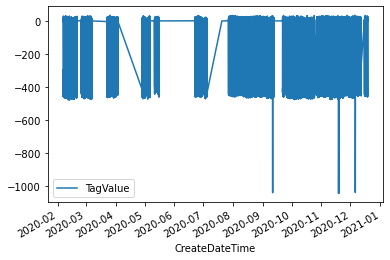

In [18]:
ID_51_2020.plot('CreateDateTime','TagValue')

<AxesSubplot:xlabel='CreateDateTime'>

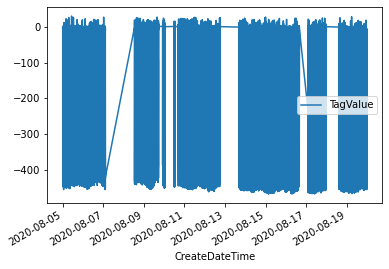

In [3]:
ID_51_2020_0809.plot('CreateDateTime','TagValue')

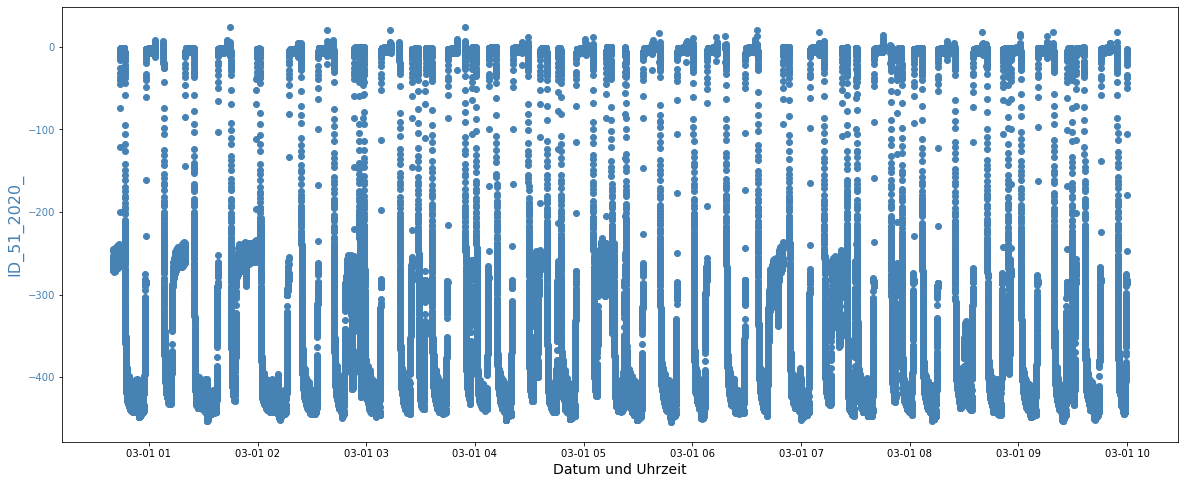

In [26]:
Daten_1=ID_51_2020
# Daten_2=ID_123_2020


Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-03-01 00:40:00')&(Daten_1['CreateDateTime']<'2020-03-01 10:00:00')]
# Daten_2=Daten_2[(Daten_2['CreateDateTime']>'2020-03-01 00:40:00')&(Daten_2['CreateDateTime']<'2020-05-06 17:00:00')]


fig, ax = plt.subplots(figsize=(20, 8))
col1 = 'steelblue'
col2 = 'red'
col3='black'
col4='green'
col5='magenta'
col6='cyan'


ax.set_xlabel('Datum und Uhrzeit', fontsize=14)
ax.set_ylabel('ID_51_2020_', color=col1, fontsize=16)
ax.scatter(Daten_1.CreateDateTime, Daten_1.TagValue, color=col1)
ax.tick_params(axis='y', labelcolor=col1)
#plt.ylim((0, 100))


#define second y-axis that shares x-axis with current plot


# ax2 = ax.twinx()
# #ax2 = ax.twiny()
# #add second line to plot
# ax2.set_ylabel('ID_123_2020', color=col2, fontsize=16)
# ax2.plot(Daten_2.CreateDateTime, Daten_2.TagValue, color=col2)
# ax2.tick_params(axis='y', labelcolor=col2)
# #plt.ylim((-1,10))

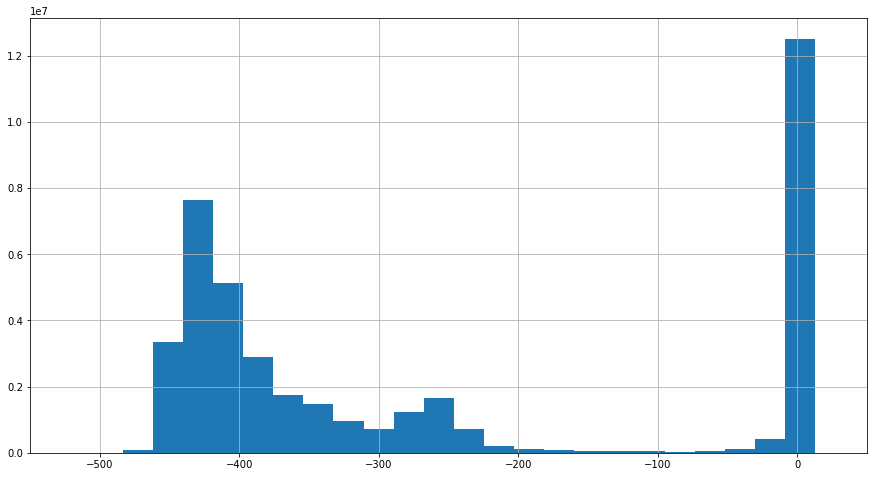

In [20]:
ID_51_2020["TagValue"].hist(bins=50,figsize=(15,8))
plt.xlim((-550,50))
plt.show()

In [27]:
ID_51_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41324356 entries, 0 to 41324355
Data columns (total 3 columns):
 #   Column          Dtype         
---  ------          -----         
 0   CreateDateTime  datetime64[ns]
 1   TagValue        float64       
 2   TagId           int32         
dtypes: datetime64[ns](1), float64(1), int32(1)
memory usage: 1.1 GB


In [35]:
TREE_1=ID_51_2020_0809
TREE_1['TagValue_0'] = TREE_1['TagValue'].apply(lambda x: -275 if (x<-200) & (x>-350) else 0)
TREE_1

,CreateDateTime,TagValue,TagId,TagValue_0
14330973,2020-08-05 00:00:00.150,-4.629639,51,0
14330974,2020-08-05 00:00:00.348,-1.736084,51,0
14330975,2020-08-05 00:00:00.562,-8.680542,51,0
14330976,2020-08-05 00:00:00.759,-3.472168,51,0
14330977,2020-08-05 00:00:00.974,-5.208374,51,0
...,...,...,...,...
17766231,2020-08-19 23:59:59.011,-229.166600,51,-275
17766232,2020-08-19 23:59:59.218,-225.694400,51,-275
17766233,2020-08-19 23:59:59.424,-221.064800,51,-275
17766234,2020-08-19 23:59:59.632,-219.328700,51,-275


In [36]:
def filter_func(x):
    if (x<-200) & (x>-350):
        return -275
    elif x<-350:
        return -430
    else:
        return 0
df = ID_51_2020_0809    
TREE_1['TagValue_0'] = TREE_1['TagValue'].apply(filter_func)
TREE_1

,CreateDateTime,TagValue,TagId,TagValue_0
14330973,2020-08-05 00:00:00.150,-4.629639,51,0
14330974,2020-08-05 00:00:00.348,-1.736084,51,0
14330975,2020-08-05 00:00:00.562,-8.680542,51,0
14330976,2020-08-05 00:00:00.759,-3.472168,51,0
14330977,2020-08-05 00:00:00.974,-5.208374,51,0
...,...,...,...,...
17766231,2020-08-19 23:59:59.011,-229.166600,51,-275
17766232,2020-08-19 23:59:59.218,-225.694400,51,-275
17766233,2020-08-19 23:59:59.424,-221.064800,51,-275
17766234,2020-08-19 23:59:59.632,-219.328700,51,-275


In [37]:
Daten_1 = TREE_1
Daten_1=Daten_1[(Daten_1['CreateDateTime']>'2020-08-05 00:40:00')&(Daten_1['CreateDateTime']<'2020-08-05 3:00:00')]
Daten_1

,CreateDateTime,TagValue,TagId,TagValue_0
14340425,2020-08-05 00:40:00.128,-2.314819,51,0
14340426,2020-08-05 00:40:00.336,-7.523193,51,0
14340427,2020-08-05 00:40:00.544,-2.314819,51,0
14340428,2020-08-05 00:40:00.754,-5.208374,51,0
14340429,2020-08-05 00:40:00.969,-3.472168,51,0
...,...,...,...,...
14372734,2020-08-05 02:59:58.972,-431.134310,51,-430
14372735,2020-08-05 02:59:59.175,-429.976900,51,-430
14372736,2020-08-05 02:59:59.396,-431.713010,51,-430
14372737,2020-08-05 02:59:59.589,-431.134310,51,-430


In [38]:
TREE_1 = TREE_1.drop('TagValue',axis = 1) 
TREE_1 = TREE_1.drop('TagId',axis = 1) 
TREE_1

,CreateDateTime,TagValue_0
14330973,2020-08-05 00:00:00.150,0
14330974,2020-08-05 00:00:00.348,0
14330975,2020-08-05 00:00:00.562,0
14330976,2020-08-05 00:00:00.759,0
14330977,2020-08-05 00:00:00.974,0
...,...,...
17766231,2020-08-19 23:59:59.011,-275
17766232,2020-08-19 23:59:59.218,-275
17766233,2020-08-19 23:59:59.424,-275
17766234,2020-08-19 23:59:59.632,-275


In [39]:
def zusammen(data,TREE_1):
    data = data[(data['CreateDateTime']>'2020-08-05 00:00:00')&(data['CreateDateTime']<'2020-08-20 00:00:00')]
    data = data.drop('TagId',axis = 1) 
    TREE_1 = TREE_1.set_index('CreateDateTime').join(data.set_index('CreateDateTime'),lsuffix = '_l', rsuffix = '_r',how = 'outer')
    TREE_1 = TREE_1.reset_index('CreateDateTime')
    TREE_1 = TREE_1.fillna(method = "ffill")
    return TREE_1


In [40]:
TREE_1 = zusammen(ID_85_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_85'}, inplace=True)
TREE_1 

,CreateDateTime,TagValue_0,TagValue_85
0,2020-08-05 00:00:00.150,0.0,NaN
1,2020-08-05 00:00:00.348,0.0,NaN
2,2020-08-05 00:00:00.562,0.0,NaN
3,2020-08-05 00:00:00.759,0.0,NaN
4,2020-08-05 00:00:00.974,0.0,NaN
...,...,...,...
3436350,2020-08-19 23:59:59.011,-275.0,1.0
3436351,2020-08-19 23:59:59.218,-275.0,1.0
3436352,2020-08-19 23:59:59.424,-275.0,1.0
3436353,2020-08-19 23:59:59.632,-275.0,1.0


In [41]:
TREE_1.isnull().sum()

CreateDateTime       0
TagValue_0           0
TagValue_85       1761
dtype: int64

In [ ]:
df['class'].value_counts()

In [42]:
TREE_1 = zusammen(ID_45_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_45'}, inplace=True)
TREE_1 

,CreateDateTime,TagValue_0,TagValue_85,TagValue_45
0,2020-08-05 00:00:00.150,0.0,NaN,NaN
1,2020-08-05 00:00:00.348,0.0,NaN,NaN
2,2020-08-05 00:00:00.562,0.0,NaN,NaN
3,2020-08-05 00:00:00.759,0.0,NaN,NaN
4,2020-08-05 00:00:00.974,0.0,NaN,NaN
...,...,...,...,...
3436912,2020-08-19 23:59:59.011,-275.0,1.0,1.0
3436913,2020-08-19 23:59:59.218,-275.0,1.0,1.0
3436914,2020-08-19 23:59:59.424,-275.0,1.0,1.0
3436915,2020-08-19 23:59:59.632,-275.0,1.0,1.0


In [44]:
TREE_1 = zusammen(ID_14_2020,TREE_1)
TREE_1.rename(columns = {'TagValue':'TagValue_14'}, inplace=True)
TREE_1 

,CreateDateTime,TagValue_0,TagValue_85,TagValue_45,TagValue_14
0,2020-08-05 00:00:00.150,0.0,NaN,NaN,NaN
1,2020-08-05 00:00:00.348,0.0,NaN,NaN,NaN
2,2020-08-05 00:00:00.562,0.0,NaN,NaN,NaN
3,2020-08-05 00:00:00.759,0.0,NaN,NaN,NaN
4,2020-08-05 00:00:00.974,0.0,NaN,NaN,NaN
...,...,...,...,...,...
3438053,2020-08-19 23:59:59.011,-275.0,1.0,1.0,0.0
3438054,2020-08-19 23:59:59.218,-275.0,1.0,1.0,0.0
3438055,2020-08-19 23:59:59.424,-275.0,1.0,1.0,0.0
3438056,2020-08-19 23:59:59.632,-275.0,1.0,1.0,0.0


In [46]:
TREE_1 = TREE_1.dropna()
TREE_1

,CreateDateTime,TagValue_0,TagValue_85,TagValue_45,TagValue_14
2993,2020-08-05 00:12:29.444,-430.0,1.0,1.0,0.0
2994,2020-08-05 00:12:30.058,-430.0,1.0,1.0,0.0
2995,2020-08-05 00:12:30.469,-430.0,1.0,1.0,0.0
2996,2020-08-05 00:12:30.678,-430.0,1.0,1.0,0.0
2997,2020-08-05 00:12:30.867,-430.0,1.0,1.0,0.0
...,...,...,...,...,...
3438053,2020-08-19 23:59:59.011,-275.0,1.0,1.0,0.0
3438054,2020-08-19 23:59:59.218,-275.0,1.0,1.0,0.0
3438055,2020-08-19 23:59:59.424,-275.0,1.0,1.0,0.0
3438056,2020-08-19 23:59:59.632,-275.0,1.0,1.0,0.0


In [55]:
X = TREE_1.drop(['TagValue_0'], axis=1)
X = X.drop(['CreateDateTime'], axis=1)

y = TREE_1['TagValue_0']

In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [57]:
X_train.shape, X_test.shape

((2301493, 3), (1133572, 3))

In [58]:
X_train.dtypes

TagValue_85    float64
TagValue_45    float64
TagValue_14    float64
dtype: object

In [59]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
# instantiate the DecisionTreeClassifier model with criterion gini index
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [61]:
y_pred_gini = clf_gini.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.6909


In [63]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([   0., -430.,    0., ...,    0.,    0., -430.])

In [64]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.6913


In [65]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.6913
Test set score: 0.6909


[Text(0.5, 0.875, 'X[0] <= 0.5\ngini = 0.612\nsamples = 2301493\nvalue = [1174360, 417506, 709627]'),
 Text(0.25, 0.625, 'X[2] <= 0.5\ngini = 0.562\nsamples = 1187770\nvalue = [358360, 144365, 685045]'),
 Text(0.125, 0.375, 'X[1] <= 0.5\ngini = 0.561\nsamples = 1182501\nvalue = [355880, 143742, 682879]'),
 Text(0.0625, 0.125, 'gini = 0.561\nsamples = 1182378\nvalue = [355880, 143621, 682877]'),
 Text(0.1875, 0.125, 'gini = 0.032\nsamples = 123\nvalue = [0, 121, 2]'),
 Text(0.375, 0.375, 'X[1] <= 0.5\ngini = 0.595\nsamples = 5269\nvalue = [2480, 623, 2166]'),
 Text(0.3125, 0.125, 'gini = 0.595\nsamples = 5267\nvalue = [2480, 621, 2166]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0]'),
 Text(0.75, 0.625, 'X[1] <= 0.5\ngini = 0.403\nsamples = 1113723\nvalue = [816000, 273141, 24582]'),
 Text(0.625, 0.375, 'X[2] <= 0.5\ngini = 0.294\nsamples = 930529\nvalue = [769202, 136774, 24553]'),
 Text(0.5625, 0.125, 'gini = 0.299\nsamples = 909949\nvalue = [748871, 136525, 24553

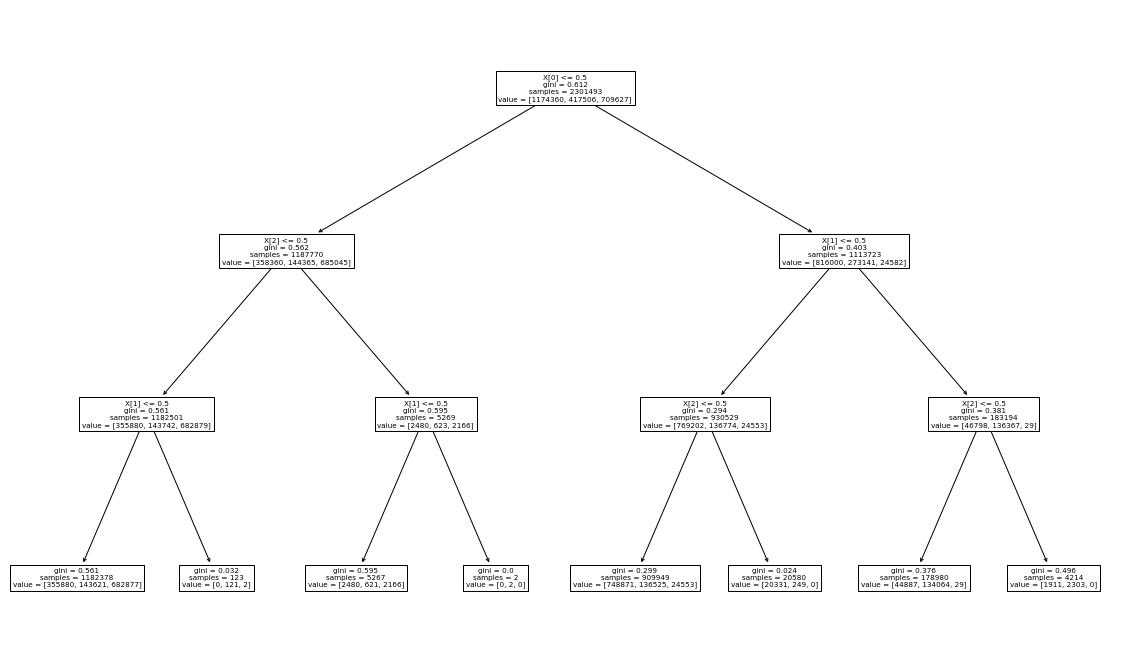

In [68]:
plt.figure(figsize=(20,12))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

In [72]:
!install graphviz
import graphviz 
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

'install' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


ModuleNotFoundError: No module named 'graphviz'